# Midterm Project

## Imports

In [124]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mutual_info_score, roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier

from IPython.display import display
from tqdm.auto import tqdm

import xgboost as xgb

## Data Preparation

### Importing Dataset

In [125]:
df = pd.read_csv("dataset.csv")

In [3]:
df

,matchId,blueWins,blueWardsPlaced,blueControlWardsPlaced,blueWardsDestroyed,blueControlWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,...,redTowersDestroyed,redPlatesDestroyed,redTotalGold,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redFirstTurret,redInhibitorsDestroyed,redFirstDragon,gameDuration
0,KR_7103467251,1,43,9,10,3,1,12,15,14,...,1,3,29411,30691,349,103,1,0,1,2343.847
1,KR_7029911546,1,36,11,5,3,1,8,5,9,...,0,4,24827,30167,403,106,0,0,0,1939.513
2,KR_7077250839,1,33,11,6,2,1,10,14,6,...,1,2,28200,29638,341,100,1,0,0,1553.700
3,KR_7101806500,0,28,5,8,5,0,14,23,9,...,1,6,31584,31717,355,82,1,0,1,2213.758
4,KR_7099122531,1,29,7,6,5,1,14,13,19,...,0,1,27239,29741,340,84,0,0,1,1470.118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94350,KR_6995090019,1,81,10,15,7,1,15,3,13,...,0,1,23074,28482,395,90,0,0,1,1168.248
94351,KR_7092903057,1,29,6,13,3,1,16,6,14,...,0,1,24500,28283,377,66,0,0,1,1339.719
94352,KR_7076707982,0,29,5,12,5,0,6,12,9,...,0,3,27488,31347,371,94,0,0,1,1399.935
94353,KR_7077663341,0,36,8,8,1,0,14,20,19,...,0,4,31258,30936,356,76,0,0,0,1909.138


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94355 entries, 0 to 94354
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   matchId                       94355 non-null  object 
 1   blueWins                      94355 non-null  int64  
 2   blueWardsPlaced               94355 non-null  int64  
 3   blueControlWardsPlaced        94355 non-null  int64  
 4   blueWardsDestroyed            94355 non-null  int64  
 5   blueControlWardsDestroyed     94355 non-null  int64  
 6   blueFirstBlood                94355 non-null  int64  
 7   blueKills                     94355 non-null  int64  
 8   blueDeaths                    94355 non-null  int64  
 9   blueAssists                   94355 non-null  int64  
 10  blueDragons                   94355 non-null  int64  
 11  blueHeralds                   94355 non-null  int64  
 12  blueVoidGrubs                 94355 non-null  int64  
 13  b

### Preliminary Cleaning

In [126]:
# Standardize columns and string data
df.columns = df.columns.str.lower()

In [128]:
# Standardize string values
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

### Finalized DataFrames

In [131]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [132]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [133]:
y_train = df_train.bluewins.values
y_val = df_val.bluewins.values
y_test = df_test.bluewins.values

del df_train['bluewins']
del df_val['bluewins']
del df_test['bluewins']

## Exploratory Data Analysis

### Basic Data Checks

In [134]:
df_full_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75484 entries, 39062 to 77708
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   matchid                       75484 non-null  object 
 1   bluewins                      75484 non-null  int64  
 2   bluewardsplaced               75484 non-null  int64  
 3   bluecontrolwardsplaced        75484 non-null  int64  
 4   bluewardsdestroyed            75484 non-null  int64  
 5   bluecontrolwardsdestroyed     75484 non-null  int64  
 6   bluefirstblood                75484 non-null  int64  
 7   bluekills                     75484 non-null  int64  
 8   bluedeaths                    75484 non-null  int64  
 9   blueassists                   75484 non-null  int64  
 10  bluedragons                   75484 non-null  int64  
 11  blueheralds                   75484 non-null  int64  
 12  bluevoidgrubs                 75484 non-null  int64  
 13  bl

In [135]:
df_full_train.describe().round()

,bluewins,bluewardsplaced,bluecontrolwardsplaced,bluewardsdestroyed,bluecontrolwardsdestroyed,bluefirstblood,bluekills,bluedeaths,blueassists,bluedragons,...,redtowersdestroyed,redplatesdestroyed,redtotalgold,redtotalexperience,redtotalminionskilled,redtotaljungleminionskilled,redfirstturret,redinhibitorsdestroyed,redfirstdragon,gameduration
count,75484.0,75484.0,75484.0,75484.0,75484.0,75484.0,75484.0,75484.0,75484.0,75484.0,...,75484.0,75484.0,75484.0,75484.0,75484.0,75484.0,75484.0,75484.0,75484.0,75484.0
mean,0.0,48.0,7.0,10.0,4.0,0.0,13.0,13.0,15.0,1.0,...,1.0,4.0,28348.0,30496.0,372.0,90.0,0.0,0.0,1.0,1529.0
std,0.0,39.0,3.0,4.0,2.0,0.0,5.0,5.0,7.0,1.0,...,1.0,3.0,2662.0,1837.0,31.0,14.0,0.0,0.0,0.0,347.0
min,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,19018.0,20736.0,199.0,0.0,0.0,0.0,0.0,930.0
25%,0.0,30.0,5.0,7.0,3.0,0.0,9.0,9.0,10.0,0.0,...,0.0,2.0,26466.0,29292.0,352.0,80.0,0.0,0.0,0.0,1286.0
50%,0.0,35.0,7.0,9.0,4.0,0.0,12.0,12.0,14.0,0.0,...,0.0,3.0,28180.0,30501.0,373.0,89.0,0.0,0.0,1.0,1516.0
75%,1.0,48.0,9.0,12.0,5.0,1.0,16.0,16.0,19.0,1.0,...,1.0,5.0,30055.0,31731.0,393.0,99.0,1.0,0.0,1.0,1759.0
max,1.0,521.0,25.0,54.0,14.0,1.0,43.0,41.0,55.0,2.0,...,10.0,15.0,42309.0,38470.0,481.0,163.0,1.0,2.0,1.0,3556.0


In [15]:
# Check for null values
df_full_train.isna().sum().sort_values(ascending=False)

matchid                         0
bluewins                        0
bluewardsplaced                 0
bluecontrolwardsplaced          0
bluewardsdestroyed              0
bluecontrolwardsdestroyed       0
bluefirstblood                  0
bluekills                       0
bluedeaths                      0
blueassists                     0
bluedragons                     0
blueheralds                     0
bluevoidgrubs                   0
bluetowersdestroyed             0
blueplatesdestroyed             0
bluetotalgold                   0
bluetotalexperience             0
bluetotalminionskilled          0
bluetotaljungleminionskilled    0
bluefirstturret                 0
blueinhibitorsdestroyed         0
bluefirstdragon                 0
redwardsplaced                  0
redcontrolwardsplaced           0
redwardsdestroyed               0
redcontrolwardsdestroyed        0
redfirstblood                   0
redkills                        0
reddeaths                       0
redassists    

In [163]:
categorical = df_full_train.select_dtypes(include='object').columns.tolist()

In [164]:
categorical

['matchid']

In [160]:
numerical = [col for col in df_full_train.columns if df_full_train[col].dtype != 'object' and col not in ['bluewins']]

In [137]:
df_full_train[numerical].var()

bluewardsplaced                 1.556927e+03
bluecontrolwardsplaced          6.445494e+00
bluewardsdestroyed              1.624399e+01
bluecontrolwardsdestroyed       3.565056e+00
bluefirstblood                  2.499654e-01
bluekills                       2.348510e+01
bluedeaths                      2.328643e+01
blueassists                     4.915705e+01
bluedragons                     4.423077e-01
blueheralds                     1.386283e-01
bluevoidgrubs                   4.148702e+00
bluetowersdestroyed             9.585950e-01
blueplatesdestroyed             9.494942e+00
bluetotalgold                   7.140972e+06
bluetotalexperience             3.439868e+06
bluetotalminionskilled          9.568968e+02
bluetotaljungleminionskilled    2.030874e+02
bluefirstturret                 2.496504e-01
blueinhibitorsdestroyed         7.149885e-04
bluefirstdragon                 2.338319e-01
redwardsplaced                  1.597787e+03
redcontrolwardsplaced           6.406899e+00
redwardsde

### Distribution Analysis

Text(0.5, 0.98, 'Distributions of Key Numerical Features')

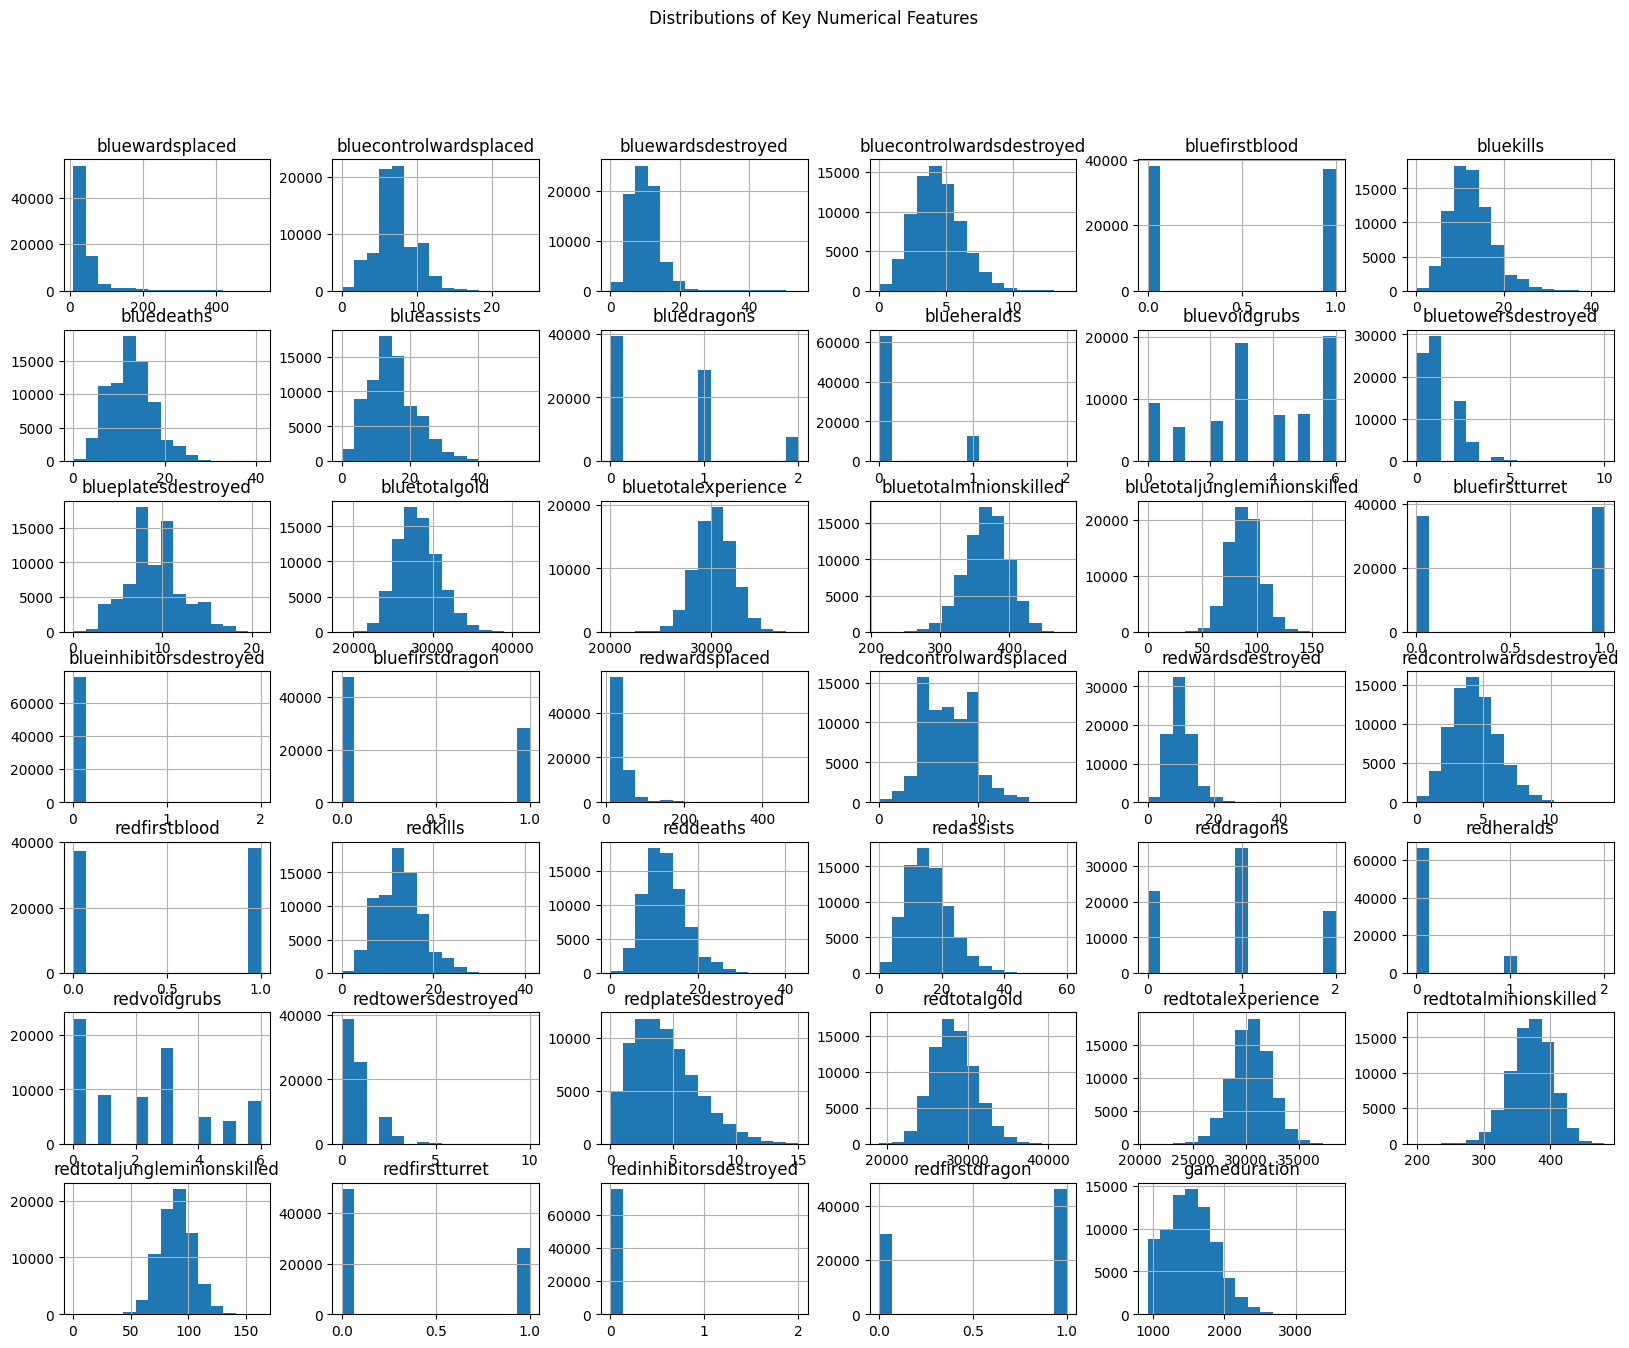

In [138]:
df_full_train[numerical].hist(figsize=(20,15), bins=15)
plt.suptitle("Distributions of Key Numerical Features")

### Target Variable Analysis

In [139]:
df_full_train.bluewins.value_counts(normalize=True)

bluewins
0    0.536736
1    0.463264
Name: proportion, dtype: float64

In [140]:
global_win = df_full_train.bluewins.mean()
global_win

np.float64(0.46326373801070425)

Text(0, 0.5, 'Proportion')

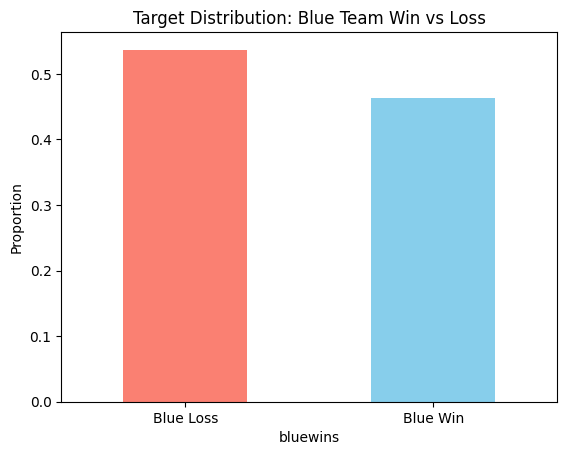

In [141]:
df_full_train['bluewins'].value_counts(normalize=True).plot(kind='bar', color=['salmon', 'skyblue'])
plt.title("Target Distribution: Blue Team Win vs Loss")
plt.xticks([0, 1], ['Blue Loss', 'Blue Win'], rotation=0)
plt.ylabel("Proportion")

### Feature Importance

#### Correlation

In [25]:
corr = df_full_train.corr(numeric_only=True)

In [26]:
corr['bluewins'].sort_values(ascending=False)

bluewins                        1.000000
bluetotalgold                   0.489436
bluetotalexperience             0.462871
reddeaths                       0.399004
bluekills                       0.399004
blueassists                     0.330417
bluefirstturret                 0.293012
bluetowersdestroyed             0.290728
blueplatesdestroyed             0.277224
bluedragons                     0.275669
bluetotalminionskilled          0.260454
bluefirstdragon                 0.215556
bluetotaljungleminionskilled    0.213386
bluevoidgrubs                   0.201619
bluefirstblood                  0.168818
blueheralds                     0.135597
bluecontrolwardsplaced          0.104244
bluewardsdestroyed              0.089529
bluecontrolwardsdestroyed       0.065154
blueinhibitorsdestroyed         0.015662
bluewardsplaced                 0.015011
gameduration                    0.006098
redwardsplaced                 -0.014898
redinhibitorsdestroyed         -0.018487
redcontrolwardsd

## Model Training

### Logistic Regression

#### Functions

In [142]:
# Applies one-hot-encoding before training with logistic regression
def train(df_train, y_train, C=1.0):
    dicts = df_train[numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [143]:
# Makes a prediction for df based on the given model
def predict(df, dv, model):
    dicts = df[numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [144]:
# Cross validation function using k folds
def cross_validation(df, n=5, C=1.0):
    kfold = KFold(n_splits=n, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df):
        df_train = df.iloc[train_idx]
        df_val = df.iloc[val_idx]

        y_train = df_train.bluewins.values
        y_val = df_val.bluewins.values

        dv, model = train(df_train, y_train, C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    return scores

In [145]:
dv, model = train(df_train, y_train)
y_pred = predict(df_val, dv, model)

In [156]:
roc_auc_score(y_val, y_pred)

0.8667872286174814

In [149]:
# Evaluate model on all thresholds
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [150]:
# Create a Confusion Table and evaluate precision and recall
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)

In [151]:
df_scores[::10]

,threshold,tp,fp,fn,tn,p,r
0,0.0,8683,10188,0,0,0.460124,1.000000
10,0.1,8551,7216,132,2972,0.542335,0.984798
20,0.2,8196,5229,487,4959,0.610503,0.943913
30,0.3,7713,3878,970,6310,0.665430,0.888287
40,0.4,7170,2797,1513,7391,0.719374,0.825751
50,0.5,6534,1944,2149,8244,0.770701,0.752505
60,0.6,5739,1243,2944,8945,0.821971,0.660947
70,0.7,4840,743,3843,9445,0.866917,0.557411
80,0.8,3637,341,5046,9847,0.914279,0.418864
90,0.9,2111,75,6572,10113,0.965691,0.243119


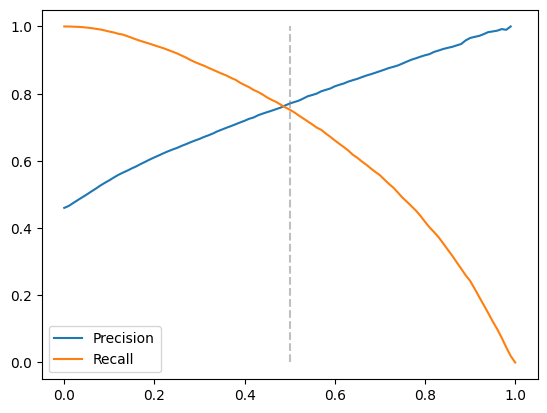

In [152]:
plt.plot(df_scores.threshold, df_scores['p'], label='Precision')
plt.plot(df_scores.threshold, df_scores['r'], label='Recall')

plt.vlines(0.5, 0, 1, color='grey', linestyle='--', alpha=0.5)

plt.legend()
plt.show()

In [36]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

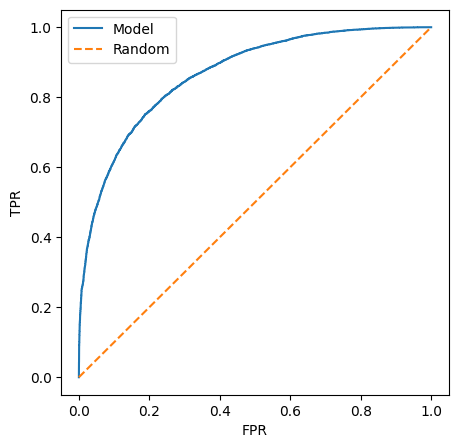

In [37]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [147]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = cross_validation(df_full_train, n_splits, C)

    print('C: %s  Score: %.4f +- %.4f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C: 0.001  Score: 0.8631 +- 0.0028
C: 0.01  Score: 0.8641 +- 0.0026
C: 0.1  Score: 0.8632 +- 0.0032
C: 0.5  Score: 0.8640 +- 0.0036
C: 1  Score: 0.8629 +- 0.0030
C: 5  Score: 0.8640 +- 0.0025
C: 10  Score: 0.8630 +- 0.0026


In [153]:
dv, model = train(df_train, y_train, C=0.01)
y_pred = predict(df_val, dv, model)

### Decision Tree

In [104]:
# Convert dataframes into dicts
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

# Convert dicts into matrices
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

In [40]:
scores = []

for depth in tqdm([4, 5, 6, 7, 8, 9, 10], desc="Outer Loop"):
    for s in tqdm([1, 5, 10, 15, 20, 500, 100, 200], desc="Inner Loop", leave=False):
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

Outer Loop:   0%|          | 0/7 [00:00<?, ?it/s]

Inner Loop:   0%|          | 0/8 [00:00<?, ?it/s]

Inner Loop:   0%|          | 0/8 [00:00<?, ?it/s]

Inner Loop:   0%|          | 0/8 [00:00<?, ?it/s]

Inner Loop:   0%|          | 0/8 [00:00<?, ?it/s]

Inner Loop:   0%|          | 0/8 [00:00<?, ?it/s]

Inner Loop:   0%|          | 0/8 [00:00<?, ?it/s]

Inner Loop:   0%|          | 0/8 [00:00<?, ?it/s]

In [41]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [42]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                                          
max_depth            4      5      6      7      8      9      10
min_samples_leaf                                                 
1                 0.856  0.865  0.868  0.867  0.865  0.857  0.849
5                 0.856  0.865  0.869  0.868  0.866  0.859  0.851
10                0.856  0.865  0.869  0.869  0.867  0.861  0.854
15                0.856  0.865  0.869  0.869  0.867  0.862  0.856
20                0.856  0.865  0.868  0.869  0.867  0.863  0.857
100               0.856  0.865  0.869  0.870  0.869  0.868  0.867
200               0.856  0.864  0.868  0.869  0.869  0.868  0.868
500               0.856  0.864  0.869  0.869  0.869  0.869  0.869

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

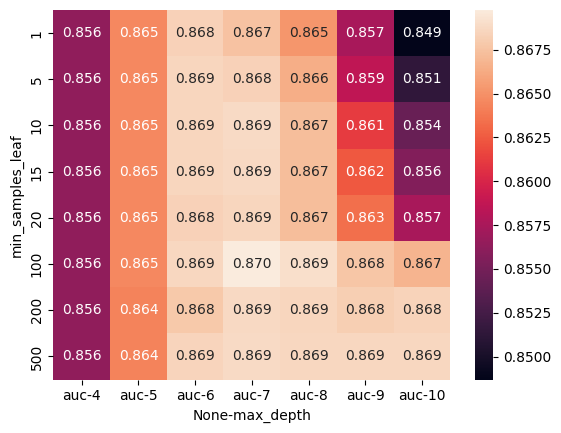

In [43]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

### Random Forest

In [172]:
scores = []

for n in tqdm([10, 50, 100, 150, 200]):
    rf = RandomForestClassifier(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

  0%|          | 0/5 [00:00<?, ?it/s]

In [173]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

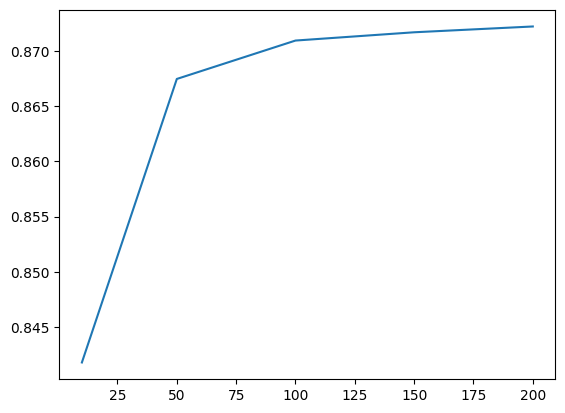

In [174]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [165]:
scores = []

for d in tqdm([1, 5, 10, 15], desc='Outer Loop'):
    for n in tqdm([10, 50, 100, 150, 200], desc='Inner Loop', leave=False):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1,
                                    n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

Outer Loop:   0%|          | 0/4 [00:00<?, ?it/s]

Inner Loop:   0%|          | 0/5 [00:00<?, ?it/s]

Inner Loop:   0%|          | 0/5 [00:00<?, ?it/s]

Inner Loop:   0%|          | 0/5 [00:00<?, ?it/s]

Inner Loop:   0%|          | 0/5 [00:00<?, ?it/s]

In [166]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

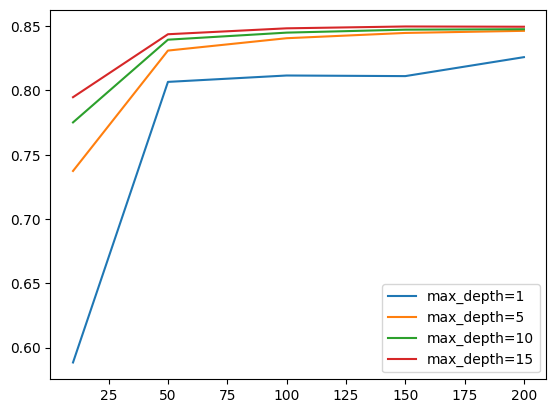

In [167]:
for d in [1, 5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [168]:
max_depth = 10

In [169]:
scores = []

for s in tqdm([1, 5, 10, 20, 50, 100], desc='Outer Loop'):
    for n in tqdm([1, 50, 100, 150, 200], desc='Inner Loop', leave=False):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1,
                                    n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

Outer Loop:   0%|          | 0/6 [00:00<?, ?it/s]

Inner Loop:   0%|          | 0/5 [00:00<?, ?it/s]

Inner Loop:   0%|          | 0/5 [00:00<?, ?it/s]

Inner Loop:   0%|          | 0/5 [00:00<?, ?it/s]

Inner Loop:   0%|          | 0/5 [00:00<?, ?it/s]

Inner Loop:   0%|          | 0/5 [00:00<?, ?it/s]

Inner Loop:   0%|          | 0/5 [00:00<?, ?it/s]

In [170]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

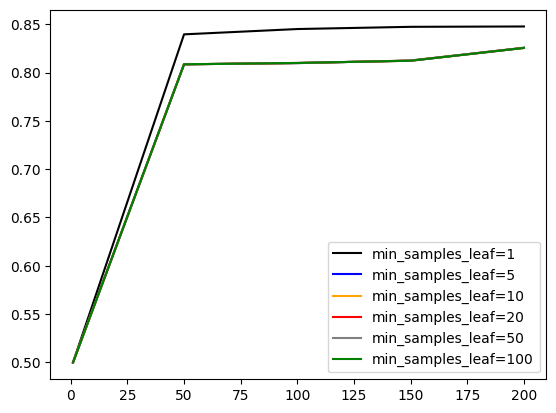

In [171]:
colors = ['black', 'blue', 'orange', 'red', 'grey', 'green']
values = [1, 5, 10, 20, 50, 100]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

### XGBoost

#### Set-Up

In [105]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [106]:
watchlist = [(dtrain, "train"), (dval, "val")]

In [19]:
scores = {} # dictionary to store results for each eta

#### Functions

In [45]:
def plot_group(prefix, scores):
    plt.figure(figsize=(10, 6))

    # Get all keys that START with the prefix + "="
    matching = {k: v for k, v in scores.items() if k.startswith(prefix + "=")}

    if not matching:
        print(f"No matching keys for prefix '{prefix}'")
        return

    for key, df in matching.items():
        plt.plot(df['iter'], df['val_auc'], label=key)

    plt.xlabel("Iteration")
    plt.ylabel("Validation AUC")
    plt.title(f"AUC vs Iterations for {prefix}")
    plt.legend()
    plt.grid(True)
    plt.show()

In [66]:
scores = {k: v for k, v in scores.items() if not k.startswith("reg_lambda")}

In [20]:
# Train XGBoost models for each eta and store AUC results
etas = [0.01, 0.05, 0.1, 0.3] # list of parameter values. in this case it is 'eta'.

for eta in tqdm(etas):
    evals_result = {}

    xgb_params = {
        'eta': eta,
        'max_depth': 6,
        'min_child_weight': 1,

        'subsample': 0.8,
        'colsample_bytree': 0.8,

        'reg_lambda': 1.0,
        'reg_alpha': 0.0,

        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 1,
        'verbosity': 1
    }

    model = xgb.train(
        xgb_params,
        dtrain,
        evals=watchlist,
        verbose_eval=0,
        num_boost_round=200,
        evals_result=evals_result
    )

    columns = ['iter', 'train_auc', 'val_auc']
    train_aucs = list(evals_result['train'].values())[0]
    val_aucs = list(evals_result['val'].values())[0]

    df_results = pd.DataFrame(
        list(zip(range(1, len(train_aucs) + 1), train_aucs, val_aucs)),
        columns=columns
    )

    key = f'eta={eta}'
    scores[key] = df_results

  0%|          | 0/4 [00:00<?, ?it/s]

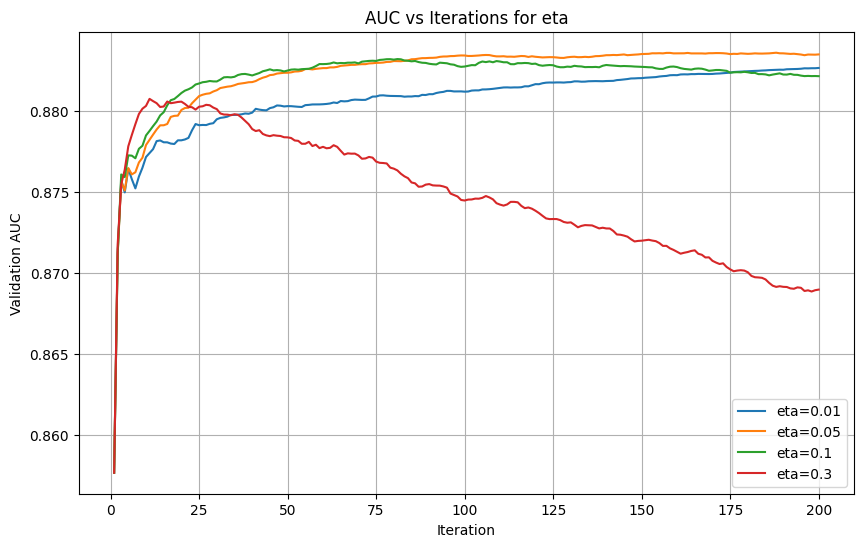

In [25]:
plot_group("eta", scores)

In [108]:
eta = 0.05

In [27]:
# Train XGBoost models for each max_depth and store AUC results
max_depths = [3, 5, 10, 15]

for max_depth in tqdm(max_depths):
    evals_result = {}

    xgb_params = {
        'eta': eta,
        'max_depth': max_depth,
        'min_child_weight': 1,

        'subsample': 0.8,
        'colsample_bytree': 0.8,

        'reg_lambda': 1.0,
        'reg_alpha': 0.0,

        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 1,
        'verbosity': 1
    }

    model = xgb.train(
        xgb_params,
        dtrain,
        evals=watchlist,
        verbose_eval=0,
        num_boost_round=200,
        evals_result=evals_result
    )

    columns = ['iter', 'train_auc', 'val_auc']
    train_aucs = list(evals_result['train'].values())[0]
    val_aucs = list(evals_result['val'].values())[0]

    df_results = pd.DataFrame(
        list(zip(range(1, len(train_aucs) + 1), train_aucs, val_aucs)),
        columns=columns
    )

    key = f'max_depth={max_depth}'
    scores[key] = df_results

  0%|          | 0/4 [00:00<?, ?it/s]

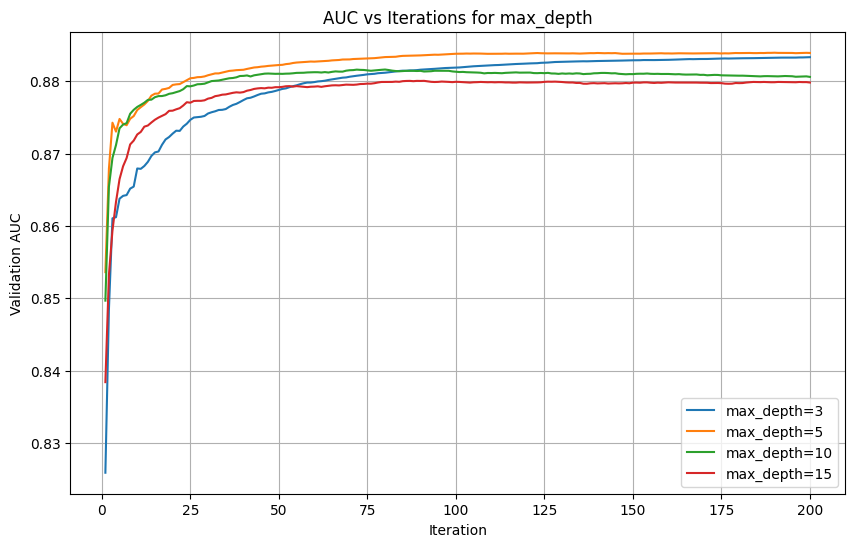

In [28]:
plot_group("max_depth", scores)

In [107]:
max_depth = 5

In [49]:
# Train XGBoost models for each min_child_weight and store AUC results
min_child_weights = [1, 10, 30, 50]

for min_child_weight in tqdm(min_child_weights):
    evals_result = {}

    xgb_params = {
        'eta': eta,
        'max_depth': max_depth,
        'min_child_weight': min_child_weight,

        'subsample': 0.8,
        'colsample_bytree': 0.8,

        'reg_lambda': 1.0,
        'reg_alpha': 0.0,

        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 1,
        'verbosity': 1
    }

    model = xgb.train(
        xgb_params,
        dtrain,
        evals=watchlist,
        verbose_eval=0,
        num_boost_round=200,
        evals_result=evals_result
    )

    columns = ['iter', 'train_auc', 'val_auc']
    train_aucs = list(evals_result['train'].values())[0]
    val_aucs = list(evals_result['val'].values())[0]

    df_results = pd.DataFrame(
        list(zip(range(1, len(train_aucs) + 1), train_aucs, val_aucs)),
        columns=columns
    )

    key = f'min_child_weight={min_child_weight}'
    scores[key] = df_results

  0%|          | 0/4 [00:00<?, ?it/s]

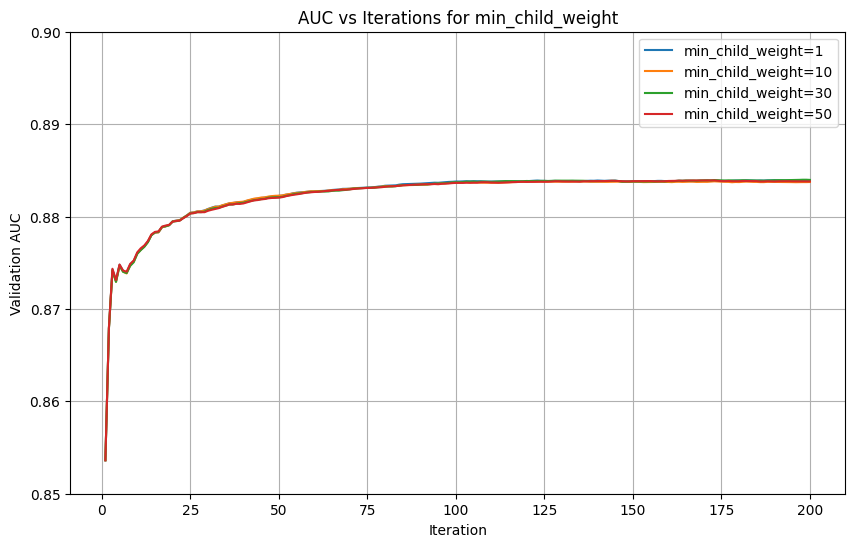

In [50]:
plot_group("min_child_weight", scores)

In [110]:
min_child_weight = 1

In [57]:
# Train XGBoost models for each subsample and store AUC results
subsamples = [0.1, 0.5, 0.8, 1.0]

for subsample in tqdm(subsamples):
    evals_result = {}

    xgb_params = {
        'eta': eta,
        'max_depth': max_depth,
        'min_child_weight': min_child_weight,

        'subsample': subsample,
        'colsample_bytree': 0.8,

        'reg_lambda': 1.0,
        'reg_alpha': 0.0,

        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 1,
        'verbosity': 1
    }

    model = xgb.train(
        xgb_params,
        dtrain,
        evals=watchlist,
        verbose_eval=0,
        num_boost_round=200,
        evals_result=evals_result
    )

    columns = ['iter', 'train_auc', 'val_auc']
    train_aucs = list(evals_result['train'].values())[0]
    val_aucs = list(evals_result['val'].values())[0]

    df_results = pd.DataFrame(
        list(zip(range(1, len(train_aucs) + 1), train_aucs, val_aucs)),
        columns=columns
    )

    key = f'subsample={subsample}'
    scores[key] = df_results

  0%|          | 0/4 [00:00<?, ?it/s]

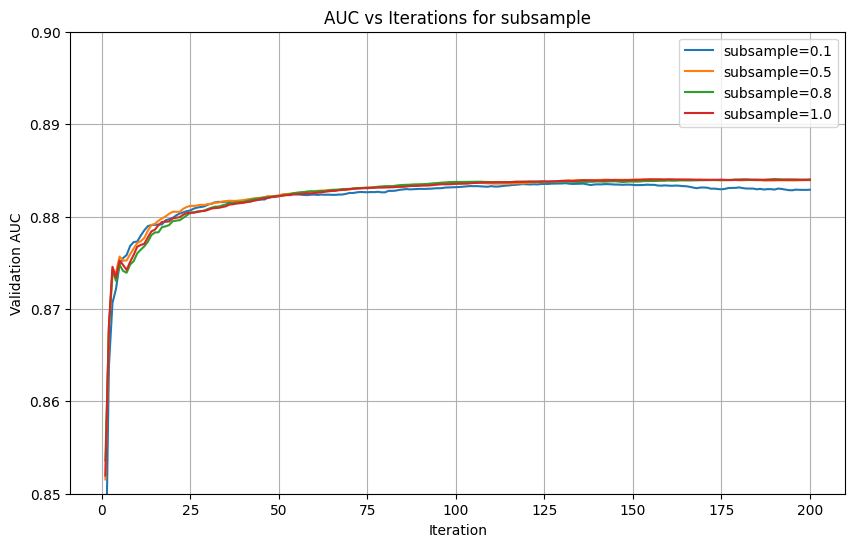

In [58]:
plot_group("subsample", scores)

In [109]:
subsample = 0.5

In [60]:
# Train XGBoost models for each colsample_bytree and store AUC results
colsample_bytrees = [0.1, 0.5, 0.8, 1.0]

for colsample_bytree in tqdm(colsample_bytrees):
    evals_result = {}

    xgb_params = {
        'eta': eta,
        'max_depth': max_depth,
        'min_child_weight': min_child_weight,

        'subsample': subsample,
        'colsample_bytree': colsample_bytree,

        'reg_lambda': 1.0,
        'reg_alpha': 0.0,

        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 1,
        'verbosity': 1
    }

    model = xgb.train(
        xgb_params,
        dtrain,
        evals=watchlist,
        verbose_eval=0,
        num_boost_round=200,
        evals_result=evals_result
    )

    columns = ['iter', 'train_auc', 'val_auc']
    train_aucs = list(evals_result['train'].values())[0]
    val_aucs = list(evals_result['val'].values())[0]

    df_results = pd.DataFrame(
        list(zip(range(1, len(train_aucs) + 1), train_aucs, val_aucs)),
        columns=columns
    )

    key = f'colsample_bytree={colsample_bytree}'
    scores[key] = df_results

  0%|          | 0/4 [00:00<?, ?it/s]

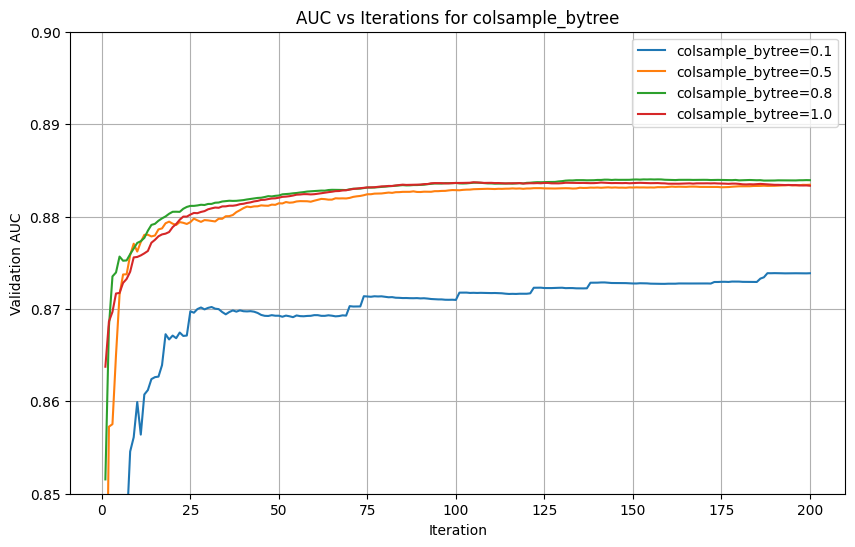

In [61]:
plot_group("colsample_bytree", scores)

In [112]:
colsample_bytree = 0.8

In [67]:
# Train XGBoost models for each reg_lambda and store AUC results
reg_lambdas = [0.1, 1, 5, 10, 20]

for reg_lambda in tqdm(reg_lambdas):
    evals_result = {}

    xgb_params = {
        'eta': eta,
        'max_depth': max_depth,
        'min_child_weight': min_child_weight,

        'subsample': subsample,
        'colsample_bytree': colsample_bytree,

        'reg_lambda': reg_lambda,
        'reg_alpha': 0.0,

        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 1,
        'verbosity': 1
    }

    model = xgb.train(
        xgb_params,
        dtrain,
        evals=watchlist,
        verbose_eval=0,
        num_boost_round=200,
        evals_result=evals_result
    )

    columns = ['iter', 'train_auc', 'val_auc']
    train_aucs = list(evals_result['train'].values())[0]
    val_aucs = list(evals_result['val'].values())[0]

    df_results = pd.DataFrame(
        list(zip(range(1, len(train_aucs) + 1), train_aucs, val_aucs)),
        columns=columns
    )

    key = f'reg_lambda={reg_lambda}'
    scores[key] = df_results

  0%|          | 0/5 [00:00<?, ?it/s]

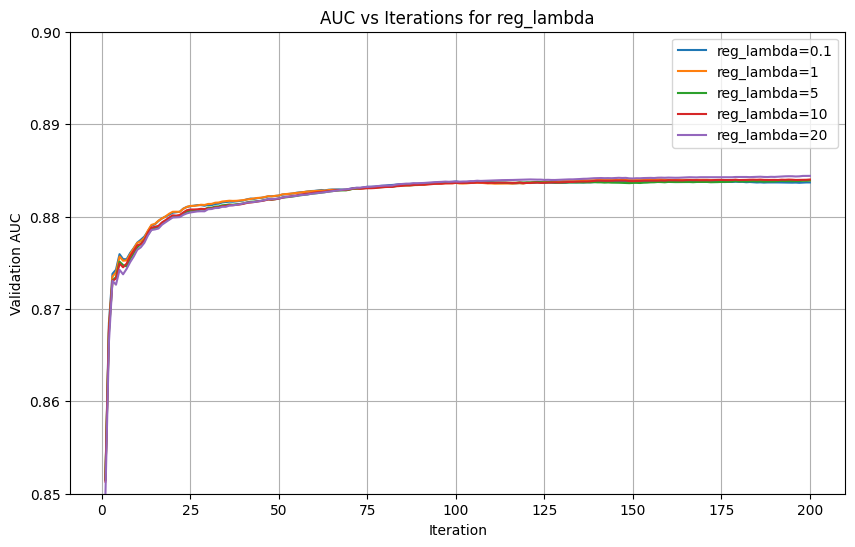

In [68]:
plot_group("reg_lambda", scores)

In [111]:
reg_lambda = 20

In [72]:
# Train XGBoost models for each reg_alpha and store AUC results
reg_alphas = [0, 0.1, 1, 5, 10]

for reg_alpha in tqdm(reg_alphas):
    evals_result = {}

    xgb_params = {
        'eta': eta,
        'max_depth': max_depth,
        'min_child_weight': min_child_weight,

        'subsample': subsample,
        'colsample_bytree': colsample_bytree,

        'reg_lambda': reg_lambda,
        'reg_alpha': reg_alpha,

        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 1,
        'verbosity': 1
    }

    model = xgb.train(
        xgb_params,
        dtrain,
        evals=watchlist,
        verbose_eval=0,
        num_boost_round=200,
        evals_result=evals_result
    )

    columns = ['iter', 'train_auc', 'val_auc']
    train_aucs = list(evals_result['train'].values())[0]
    val_aucs = list(evals_result['val'].values())[0]

    df_results = pd.DataFrame(
        list(zip(range(1, len(train_aucs) + 1), train_aucs, val_aucs)),
        columns=columns
    )

    key = f'reg_alpha={reg_alpha}'
    scores[key] = df_results

  0%|          | 0/5 [00:00<?, ?it/s]

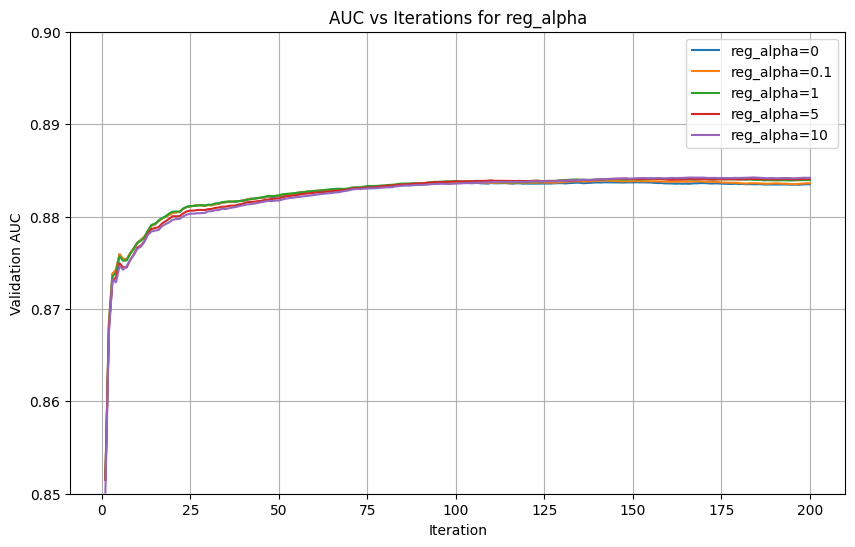

In [73]:
plot_group("reg_alpha", scores)

In [113]:
reg_alpha = 10

### Selecting Final Model

In [175]:
# Tuned Logistic Regression
dv, model = train(df_train, y_train, C=0.01)
y_pred = predict(df_val, dv, model)
roc_auc_score(y_val, y_pred)

0.8667872286174814

In [176]:
# Tuned Decision Tree
dt = DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8697732485316588

In [183]:
# Tuned Random Forest
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=1,
                            random_state=1)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8476223639592703

In [159]:
# Tuned XGB
xgb_params = {
    'eta': 0.05, 
    'max_depth': 5,
    'min_child_weight': 1,

    'subsample': 0.5,
    'colsample_bytree': 0.8,

    'reg_lambda': 20,
    'reg_alpha': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200)
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.884023793881975

### Evaluating Final Model

In [114]:
# Prepare full training dataset for evaluating test dataset
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = df_full_train.bluewins.values
del df_full_train['bluewins']

In [115]:
dicts_full_train = df_full_train[numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [119]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=list(dv.get_feature_names_out()))

dtest = xgb.DMatrix(X_test, feature_names=list(dv.get_feature_names_out()))

In [120]:
xgb_params = {
    'eta': 0.05, 
    'max_depth': 5,
    'min_child_weight': 1,

    'subsample': 0.5,
    'colsample_bytree': 0.8,

    'reg_lambda': 20,
    'reg_alpha': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=200)

In [121]:
y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred)

0.8865647891303536